# Preparación de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display_html

In [2]:
# Carga los archivos de datos 

df = pd.read_csv('/home/dilcia/Documentos/games.csv')

In [3]:
# Imprime la información general

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Conversión y Limpieza da Datos

In [4]:
# Imprime una muestra de datos 

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Convertir nombres de columnas en minisculas

df_colmuns = df.copy()

def clean(df_colmuns):

    new_column_names = []

    for column in df_colmuns.columns:
    
        minuscula = column.lower()
        new_column_names.append(minuscula)

    df_colmuns.columns =  new_column_names
    
    return df_colmuns

df_clean = clean(df_colmuns)
display(df_clean)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# Verificando si hay valores nulos

df_clean.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# Examinando los valores que componen a mi tabla rating, para verificar como tratar estos ausentes

rating_valores = df_clean['rating'].unique()

display(rating_valores)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Entertainment Software Rating Board (ESRB)**

De acuerdo a la organización independiente en Estados Unidos que se encarga de asignar clasificaciones a los videojuegos y su contenido las clasificaciones que podemos encontrar son las siguientes:

- E (Everyone) : Apto para todos
- M : Apto para mayores de 17 años
- T: Apto para adolescentes (13 años y más)
- E10+ : Apto para personas de 10 años o más
- K-A: Apto para niños y adultos
- AO: : Solo para adultos (18 años y más)
- EC: Apto para la primera infancia.
- RP: Rating Pending (Clasificación pendiente)

**Comentario:** Rellenaremos con RP: Rating Pending (Clasificación pendiente) nuestros NaN

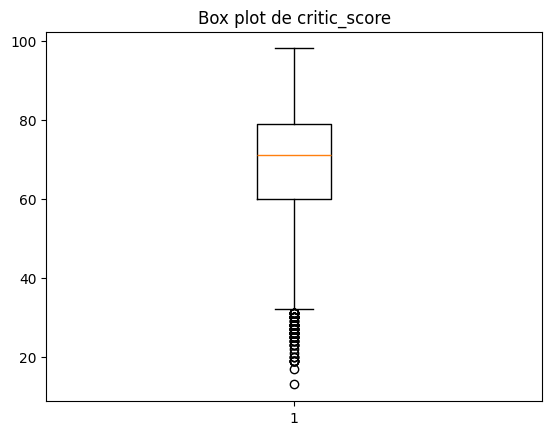

In [8]:
# Evaluar con un box plot el campo de critic_score, para determinar como rellenar los valores ausentes 

evaluar_ausentes_critic = df_clean[df_clean['critic_score'].notna()]

# Guardar en variable solo la columna con los valores que nos interesa para graficar

critic_score_notna = evaluar_ausentes_critic['critic_score']

# Realizar diagrama de box plot de critic_score

plt.boxplot(critic_score_notna)
plt.title('Box plot de critic_score')
plt.show()


**Comentario:** Encontramos valores atipicos, asi que rellenaremos con la mediana los NaN de la columna critic_score

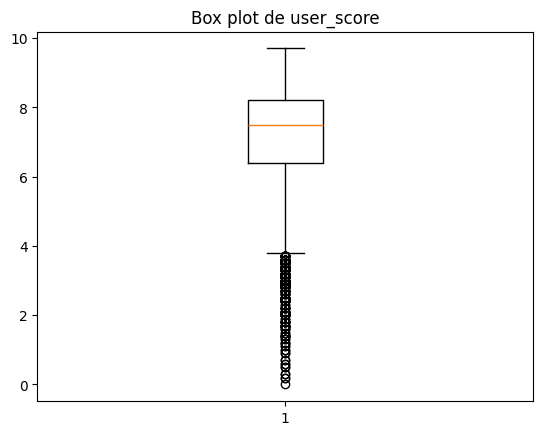

In [9]:
# Evaluar con un box plot el campo de user_score, para determinar como rellenar los valores ausentes 

# Filtrar nuestra columna user_score que no contega NaN y tbd 

filtro_notna_tbd_user =df_clean[df_clean['user_score'].notna() & ~(df_clean['user_score']=='tbd')].copy()

# Convertir a tipo numerico para para evaluar en nuestro box plot

filtro_notna_tbd_user['user_score'] = pd.to_numeric(filtro_notna_tbd_user['user_score'], errors='coerce')

# Forzar el tipo de dato

filtro_notna_tbd_user['user_score'] = filtro_notna_tbd_user['user_score'].astype('float')

# Guardar en variable solo la columna con los valores que nos interesa para graficar

user_score_notna = filtro_notna_tbd_user['user_score']

# Realizar diagrama de box plot de critic_score

plt.boxplot(user_score_notna)
plt.title('Box plot de user_score')
plt.show()


**Comentario:** Encontramos valores atipicos, asi que rellenaremos con la mediana los NaN de la columna user_score

In [10]:
# Rellenar ausentes NaN de la columna rating

clean_df = df_clean.copy()

clean_df['rating'] = clean_df['rating'].fillna('RP')

# Imprimir cambio realizado

rating_val_clean = clean_df['rating'].unique()

display(rating_val_clean)


array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

In [11]:
# Calcular mediana de la columna critic_score 

filtro_critic = clean_df[clean_df['critic_score'].notna()]

# Ordenar valores de mi campo critic_score

filtro_critic = filtro_critic['critic_score'].sort_values()

# Calcular la mediana

mediana_critic = filtro_critic.median()

print('Mediana de critic_score es:', mediana_critic)


Mediana de critic_score es: 71.0


In [12]:
# Calcular mediana de la columna user_score

# Ordenar valores de mi campo user_score

filtro_user = user_score_notna.sort_values()

# Calcular la mediana

mediana_user = filtro_user.median()

print('Mediana de user_score es:', mediana_user)


Mediana de user_score es: 7.5


In [13]:
# Rellenar ausentes NaN de la columna critic_score y user_score con las medianas calculadas para cada caso

df_games_clean = clean_df.copy()

df_games_clean['critic_score'] = df_games_clean['critic_score'].fillna(71.0)
df_games_clean['user_score'] = df_games_clean['user_score'].fillna(7.5)

df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [14]:
# Rellenar los tbd user_score con la mediana que usamos para rellenar los NaN

df_games_clean['user_score'] = df_games_clean['user_score'].replace('tbd', 7.5)


In [15]:
# Calcular el porcentaje de valores ausentes

porcentaje_ausentes = df_games_clean['year_of_release'].isnull().mean() * 100

print(porcentaje_ausentes)

1.609332934489979


**Comentario:** Rellenaremos los ausentes de años de lanzamiento NaN con un valor de fecha frecuente, dado que el porcentaje de valores NaN
es realmente muy pequeño, no afecta el analisis de datos, solo rellenaremos con fechas aquellos nombres de videos juegos que contengan el  año en el mismo nombre.

Utilizaremos el año mas frecuente para mantener una integridad de datos, sin necesidad de introducir un sesgo significativo.

In [16]:
# Filtrar nombres que contienen un año en name (números de 4 dígitos)

filtro_nan_name = df_games_clean[df_games_clean['year_of_release'].isna() & (df_games_clean['name'].str.contains(r'\d{4}', na=False))]

display(filtro_nan_name)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,71.0,7.5,RP
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,71.0,7.5,RP
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,7.5,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E


In [17]:
df_games_clean_year = df_games_clean.copy()

data_year = {'Madden NFL 2004': 2004.0,
            'FIFA Soccer 2004': 2004.0,
            'wwe Smackdown vs. Raw 2006': 2006.0,
            'NASCAR Thunder 2003': 2003,
            'PES 2009: Pro Evolution Soccer': 2009.0,
            'Madden NFL 2002': 2002.0,
            'NFL GameDay 2003': 2003.0,
            'NBA Live 2003': 2003.0,
            'Tomb Raider (2013)': 2013.0,
            'All-Star Baseball 2005':2005.0, 
            'NBA Live 2003': 2003.0,
            'All-Star Baseball 2005': 2005.0,
            'Tour de France 2011': 2011.0,
            'Sega Rally 2006': 2006.0,
            'PDC World Championship Darts 2008': 2008.0,
            'Football Manager 2007': 2007.0,
            'PDC World Championship Darts 2008': 2008.0
            }

# Filtrar los índices donde 'year_of_release' es NaN y el nombre contiene un año

filtro_indices = df_games_clean_year.index[df_games_clean_year['year_of_release'].isna() & (df_games_clean_year['name'].str.contains(r'\d{4}', na=False))]

# Usamos .loc para asignar los valores del año usando el diccionario creado

df_games_clean_year.loc[filtro_indices, 'year_of_release'] = df_games_clean_year.loc[filtro_indices, 'name'].map(data_year)

# Impresion de muestra despues del reemplazo

filtro_name_year = df_games_clean_year[df_games_clean_year['name']=='PDC World Championship Darts 2008']

display(filtro_name_year)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,2008.0,Sports,0.01,0.00,0.0,0.00,71.0,7.5,RP
16373,PDC World Championship Darts 2008,PSP,2008.0,Sports,0.01,0.00,0.0,0.00,43.0,7.5,E10+


In [18]:
# Contar ocurrencias y obtener el año más frecuente

año_mas_frecuente = df_games_clean['year_of_release'].value_counts().idxmax()

print("El año más frecuente es:", año_mas_frecuente)


El año más frecuente es: 2008.0


In [19]:
# Usaremos el año más frecuente para rellenar el restante de valores NaN de year_of_release

df_games_clean_fill = df_games_clean_year.copy()

df_games_clean_fill['year_of_release'] = df_games_clean_fill['year_of_release'].fillna(2008.0)

df_games_clean_fill.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Realizamos cambio en el tipo de datos de los siguientes campos:

- year_of_release a int 
- critic_score a float 
- user_score a float 

In [20]:
# Realizar cambio del tipo de dato

df_games_dtype = df_games_clean_fill.copy()

df_games_dtype['year_of_release'] = df_games_dtype['year_of_release'].astype('int')
df_games_dtype['user_score'] = df_games_dtype['user_score'].astype('float')

df_games_dtype.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [25]:
# Muestra de nuestro datos casi limpios

display(df_games_dtype)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,RP
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,RP
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,RP
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,RP
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,RP


In [31]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

df_games_sales = df_games_dtype.copy()

df_games_sales['total_sales'] = df_games_sales['na_sales'] + df_games_sales['eu_sales'] +  df_games_sales['jp_sales']

display(df_games_sales)


df_games = df_games_sales.copy()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,RP,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,RP,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,RP,0.01


In [33]:
# Imaginemos que tu DataFrame limpio se llama df_limpio
df_games.to_csv('df_games.csv', index=False)